In [20]:
from scipy.stats import spearmanr, kendalltau
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
print 'Run "%matplotlib inline" for graphs '

p = pd.read_csv('data/nbaplayerstats.csv')
t = pd.read_csv('data/nbateamstats.csv')
teamAcr = {'GoldenStateWarriors': 'GSW', 'SanAntonioSpurs': 'SAS', 'HoustonRockets': 'HOU', \
           'ClevelandCavaliers': 'CLE', 'BostonCeltics': 'BOS', 'UtahJazz': 'UTA', 'LAClippers': 'LAC', \
           'MemphisGrizzlies': 'MEM', 'WashingtonWizards': 'WAS', 'TorontoRaptors': 'TOR', 'AtlantaHawks': 'ATL', \
           'OklahomaCityThunder': 'OKC', 'IndianaPacers': 'IND', 'ChicagoBulls': 'CHI', 'DetroitPistons': 'DET', \
           'CharlotteHornets': 'CHA', 'DenverNuggets': 'DEN', 'MiamiHeat': 'MIA', 'MilwaukeeBucks': 'MIL', \
           'PortlandTrailBlazers': 'POR', 'NewYorkKnicks': 'NYK', 'DallasMavericks': 'DAL', 'SacramentoKings': 'SAC', \
           'NewOrleansPelicans': 'NOP', 'MinnesotaTimberwolves': 'MIN', 'OrlandoMagic': 'ORL', \
           'Philadelphia76ers': 'PHI', 'LosAngelesLakers': 'LAL', 'PhoenixSuns': 'PHX', 'BrooklynNets': 'BKN'}
teamRoster = {}
for i in teamAcr.values():
    teamRoster[i] = []
n = 0
#player names -> Team, Stats, Defstats
playerlist = {}
for i in p['PLAYER']:
    a = i.replace(' ', '')
    b = pd.read_csv('data/' + a + '.csv')
    c = pd.read_csv('data/' + a + 'Def.csv')
    d = p['TEAM'][n]
    e = pd.read_csv('data/' + a + 'gamelog.csv')
    e = e.drop(e.columns[0], axis = 1)
    teamRoster[d].append(i)
    playerlist[i] ={'TEAM': d, 'STATS': b, 'DEFSTATS': c, 'GAMELOGS': e}
    n = n + 1
playerStatsColumns = playerlist['Russell Westbrook']['STATS'].columns
playerDefStatsColumns = playerlist['Russell Westbrook']['DEFSTATS'].columns
playerGameLogsColumns = playerlist['Russell Westbrook']['GAMELOGS'].columns

def getPlayerStats(player, cols = playerStatsColumns):
    if not player in playerlist.keys():
        return 'Thats not a valid Player'
    else:
        return playerlist[player]['STATS'][cols]
def getPlayerDefStats(player, cols = playerDefStatsColumns):
    if not player in playerlist.keys():
        return 'Thats not a valid Player'
    else:
        return playerlist[player]['DEFSTATS'][cols]
def getPlayerGamelogs(player, cols = playerGameLogsColumns):
    if not player in playerlist.keys():
        return 'Thats not a valid player'
    else:
        return playerlist[player]['GAMELOGS'][cols]
#team abbr, stats, gamelogs, players
teamlist = {}
n = 0
t['W-L'] = None
for i in t['TEAM']:
    a = i.replace(' ', '')
    b = pd.read_csv('data/' + a + '.csv')
    b = b.drop(b.columns[0], axis = 1)
    c = pd.read_csv('data/' + a + 'gamelog.csv')
    c = c.drop(c.columns[0], axis = 1)
    d = teamAcr[a]
    t['W-L'][n] = str(t['W'][n]) + '-' + str(t['L'][n])
    teamlist[d] ={ 'STATS': b, 'GAMELOGS': c, 'PLAYERS': teamRoster[d], 'RECORD': t['W-L'][n]}
    n = n + 1

teamStatsColumns = teamlist['OKC']['STATS'].columns
teamGameLogsColumns = teamlist['OKC']['GAMELOGS'].columns

def getTeamStats(team, cols = teamStatsColumns):
    if not team in teamlist.keys():
        return 'Thats not a valid team'
    else:
        return teamlist[team]['STATS'][cols]
def getTeamGamelogs(team, cols = teamGameLogsColumns):
    if not team in teamlist.keys():
        return 'Thats not a valid team'
    else:
        return teamlist[team]['GAMELOGS'][cols]

p['WIN%'] = p['W']/p['L']*100
pwinratiocorr = pd.DataFrame(p.corr()['WIN%']).sort_values(by = 'WIN%', ascending = 0)
def plotPlayersWinper(x):
    sns.lmplot(x, 'WIN%', p, palette='Set2')

playerWLCorr = {}
playerHACorr ={}
for i in playerlist:
    a = []
    a1 = []
    for j in playerGameLogsColumns[3:22]:
        b = getPlayerGamelogs(i, ['W/L',j]).sort_values(by = 'W/L', ascending=0)
        c = kendalltau(b['W/L'], b[j])
        c = c + (abs(c[0]),)
        d = spearmanr(b['W/L'], b[j])
        d = d + (abs(d[0]),)
        a.append([j, c[0], c[2], c[1], d[0], d[2], d[1]])
        b1 = getPlayerGamelogs(i, ['ARENA',j]).sort_values(by = 'ARENA', ascending=0)
        c1 = kendalltau(b1['ARENA'], b1[j])
        c1 = c1 + (abs(c1[0]),)
        d1 = spearmanr(b1['ARENA'], b1[j])
        d1 = d1 + (abs(d1[0]),)
        a1.append([j, c1[0], c1[2], c1[1], d1[0], d1[2], d1[1]])
    a = pd.DataFrame(a)
    a.columns = ['STATVAR', 'W/Lktcorr', 'absktcorr', 'ktpval', 'W/Lsmcorr', 'abssmcorr', 'smpval']
    a = a[a['ktpval'] < 0.05]
    b = a['absktcorr'].sum()
    c = a[a['W/Lktcorr'] > 0]
    c = c['W/Lktcorr'].sum()
    d = a[a['W/Lktcorr'] < 0]
    d = d['W/Lktcorr'].sum()
    a1 = pd.DataFrame(a1)
    a1.columns = ['STATVAR', 'ARENAktcorr', 'absktcorr', 'ktpval', 'ARENAsmcorr', 'abssmcorr', 'smpval']
    a1 = a1[a1['ktpval'] < 0.05]
    b1 = a1['absktcorr'].sum()
    c1 = a1[a1['ARENAktcorr'] > 0]
    c1 = c1['ARENAktcorr'].sum()
    d1 = a1[a1['ARENAktcorr'] < 0]
    d1 = d1['ARENAktcorr'].sum()
    playerWLCorr[i] = {'corrTable': a.sort_values(by='W/Lktcorr', ascending=0), 'impact': b, 'posimpact': c, 'negimpact': d}
    playerHACorr[i] = {'corrTable': a1.sort_values(by='ARENAktcorr', ascending=0), 'impact': b1, 'homeimpact': c1, 'awayimpact': d1}
        
def plotPlayerWFactors(x, size = 3):
    print x
    a = playerWLCorr[x]['corrTable'][:size]
    print a
    a = list(a['STATVAR'])
    a.append('W/L')
    g = sns.PairGrid(getPlayerGamelogs(x, a).sort_values(by = 'W/L', ascending=0), hue = 'W/L', palette='Set2',\
                     hue_kws={'cmap':['Greens', 'Oranges']})
    g.map_upper(plt.scatter)
    g.map_diag(plt.hist)
    g.map_lower(sns.kdeplot)
    g.add_legend()
    g.fig.suptitle(x, fontsize=20)

def plotPlayerLFactors(x, size = 3):
    print x
    a = playerWLCorr[x]['corrTable'][-size:]
    print a
    a = list(a['STATVAR'])
    a.append('W/L')
    g = sns.PairGrid(getPlayerGamelogs(x, a).sort_values(by = 'W/L', ascending=0), hue = 'W/L', palette='Set2',\
                     hue_kws={'cmap':['Greens', 'Oranges']})
    g.map_upper(plt.scatter)
    g.map_diag(plt.hist)
    g.map_lower(sns.kdeplot)
    g.add_legend()
    g.fig.suptitle(x, fontsize=20)

def plotPlayerHomeFactors(x, size = 3):
    print x
    a = playerHACorr[x]['corrTable'][:3]
    print a
    a = list(a['STATVAR'])
    a.append('ARENA')
    g = sns.PairGrid(getPlayerGamelogs(x, a).sort_values(by = 'ARENA', ascending=0), hue = 'ARENA', palette='Set2',\
                     hue_kws={'cmap':['Greens', 'Oranges']})
    g.map_upper(plt.scatter)
    g.map_diag(plt.hist)
    g.map_lower(sns.kdeplot)
    g.add_legend()
    g.fig.suptitle(x, fontsize=20)

def plotPlayerAwayFactors(x, size = 3):
    print x
    a = playerHACorr[x]['corrTable'][-3:]
    print a
    a = list(a['STATVAR'])
    a.append('ARENA')
    g = sns.PairGrid(getPlayerGamelogs(x, a).sort_values(by = 'ARENA', ascending=0), hue = 'ARENA', palette='Set2',\
                     hue_kws={'cmap':['Greens', 'Oranges']})
    g.map_upper(plt.scatter)
    g.map_diag(plt.hist)
    g.map_lower(sns.kdeplot)
    g.add_legend()
    g.fig.suptitle(x, fontsize=20)

def plotPlayerWFactBox(x, i = 1):
    print x
    a = playerWLCorr[x]['corrTable'][i-1:i]
    print a
    a = list(a['STATVAR'])
    a.append('W/L')
    a.append('ARENA')
    b = getPlayerGamelogs(x, a).sort_values(by = 'W/L', ascending=0).sort_values(by = 'ARENA', ascending=0)
    sns.boxplot(x='W/L', y=a[0], hue='ARENA', data=b, palette='PRGn')

def plotPlayerLFactBox(x, i = 1):
    print x
    if i == 1:
        a = playerWLCorr[x]['corrTable'][-i:]
    else: 
        a = playerWLCorr[x]['corrTable'][-i:-(i-1)]
    print a
    a = list(a['STATVAR'])
    a.append('W/L')
    a.append('ARENA')
    b = getPlayerGamelogs(x, a).sort_values(by = 'W/L', ascending=0).sort_values(by = 'ARENA', ascending=0)
    sns.boxplot(x='W/L', y=a[0], hue='ARENA', data=b, palette='PRGn')

twinratiocorr = pd.DataFrame(t.corr()['WIN%']).sort_values(by = 'WIN%', ascending = 0)
teamWinPerCorr = {}

def plotTeamsWinper(x):
    sns.lmplot(x, 'WIN%', t, palette='Set2')

for i in teamlist:
    x = getTeamStats(i).corr()[['WIN%']]
    teamWinPerCorr[i] = x.sort_values(by='WIN%', ascending=0)

teamWLCorr = {}
teamHACorr ={}
for i in teamlist:
    a = []
    a1 = []
    for j in teamGameLogsColumns[3:21]:
        b = getTeamGamelogs(i, ['W/L',j]).sort_values(by = 'W/L', ascending=0)
        c = kendalltau(b['W/L'], b[j])
        c = c + (abs(c[0]),)
        d = spearmanr(b['W/L'], b[j])
        d = d + (abs(d[0]),)
        a.append([j, c[0], c[2], c[1], d[0], d[2], d[1]])
        b1 = getTeamGamelogs(i, ['ARENA',j]).sort_values(by = 'ARENA', ascending=0)
        c1 = kendalltau(b1['ARENA'], b1[j])
        c1 = c1 + (abs(c1[0]),)
        d1 = spearmanr(b1['ARENA'], b1[j])
        d1 = d1 + (abs(d1[0]),)
        a1.append([j, c1[0], c1[2], c1[1], d1[0], d1[2], d1[1]])
    a = pd.DataFrame(a)
    a.columns = ['STATVAR', 'W/Lktcorr', 'absktcorr', 'ktpval', 'W/Lsmcorr', 'abssmcorr', 'smpval']
    a = a[a['ktpval'] < 0.05]
    b = a['absktcorr'].sum()
    c = a[a['W/Lktcorr'] > 0]
    c = c['W/Lktcorr'].sum()
    d = a[a['W/Lktcorr'] < 0]
    d = d['W/Lktcorr'].sum()
    a1 = pd.DataFrame(a1)
    a1.columns = ['STATVAR', 'ARENAktcorr', 'absktcorr', 'ktpval', 'ARENAsmcorr', 'abssmcorr', 'smpval']
    a1 = a1[a1['ktpval'] < 0.05]
    b1 = a1['absktcorr'].sum()
    c1 = a1[a1['ARENAktcorr'] > 0]
    c1 = c1['ARENAktcorr'].sum()
    d1 = a1[a1['ARENAktcorr'] < 0]
    d1 = d1['ARENAktcorr'].sum()
    teamWLCorr[i] = {'corrTable': a.sort_values(by='W/Lktcorr', ascending=0), 'impact': b, 'posimpact': c, 'negimpact': d}
    teamHACorr[i] = {'corrTable': a1.sort_values(by='ARENAktcorr', ascending=0), 'impact': b1, 'homeimpact': c1, 'awayimpact': d1}
    
def plotTeamWFactors(x, size = 3):
    print x 
    print 'RECORD: ' + teamlist[x]['RECORD']
    a = teamWLCorr[x]['corrTable'][:size]
    print a
    a = list(a['STATVAR'])
    a.append('W/L')
    g = sns.PairGrid(getTeamGamelogs(x, a).sort_values(by = 'W/L', ascending=0), hue = 'W/L', palette='Set2',\
                     hue_kws={'cmap':['Greens', 'Oranges']})
    g.map_upper(plt.scatter)
    g.map_diag(plt.hist)
    g.map_lower(sns.kdeplot)
    g.add_legend()
    g.fig.suptitle(x, fontsize=20)

def plotTeamLFactors(x, size = 3):
    print x 
    print 'RECORD: ' + teamlist[x]['RECORD']
    a = teamWLCorr[x]['corrTable'][-size:]
    print a
    a = list(a['STATVAR'])
    a.append('W/L')
    g = sns.PairGrid(getTeamGamelogs(x, a).sort_values(by = 'W/L', ascending=0), hue = 'W/L', palette='Set2',\
                     hue_kws={'cmap':['Greens', 'Oranges']})
    g.map_upper(plt.scatter)
    g.map_diag(plt.hist)
    g.map_lower(sns.kdeplot)
    g.add_legend()
    g.fig.suptitle(x, fontsize=20)

def plotTeamHomeFactors(x, size = 3):
    print x 
    print 'RECORD: ' + teamlist[x]['RECORD']
    a = teamHACorr[x]['corrTable'][:3]
    print a
    a = list(a['STATVAR'])
    a.append('ARENA')
    g = sns.PairGrid(getTeamGamelogs(x, a).sort_values(by = 'ARENA', ascending=0), hue = 'ARENA', palette='Set2',\
                     hue_kws={'cmap':['Greens', 'Oranges']})
    g.map_upper(plt.scatter)
    g.map_diag(plt.hist)
    g.map_lower(sns.kdeplot)
    g.add_legend()
    g.fig.suptitle(x, fontsize=20)

def plotTeamAwayFactors(x, size = 3):
    print x 
    print 'RECORD: ' + teamlist[x]['RECORD']
    a = teamHACorr[x]['corrTable'][-3:]
    print a
    a = list(a['STATVAR'])
    a.append('ARENA')
    g = sns.PairGrid(getTeamGamelogs(x, a).sort_values(by = 'ARENA', ascending=0), hue = 'ARENA', palette='Set2',\
                     hue_kws={'cmap':['Greens', 'Oranges']})
    g.map_upper(plt.scatter)
    g.map_diag(plt.hist)
    g.map_lower(sns.kdeplot)
    g.add_legend()
    g.fig.suptitle(x, fontsize=20)

def plotTeamWFactBox(x, i = 1):
    print x 
    print 'RECORD: ' + teamlist[x]['RECORD']
    a = teamWLCorr[x]['corrTable'][i-1:i]
    print a
    a = list(a['STATVAR'])
    a.append('W/L')
    a.append('ARENA')
    b = getTeamGamelogs(x, a).sort_values(by = 'W/L', ascending=0).sort_values(by = 'ARENA', ascending=0)
    sns.boxplot(x='W/L', y=a[0], hue='ARENA', data=b, palette='PRGn')

def plotTeamLFactBox(x, i = 1):
    print x 
    print 'RECORD: ' + teamlist[x]['RECORD']
    if i == 1:
        a = teamWLCorr[x]['corrTable'][-i:]
    else: 
        a = teamWLCorr[x]['corrTable'][-i:-(i-1)]
    print a
    a = list(a['STATVAR'])
    a.append('W/L')
    a.append('ARENA')
    b = getTeamGamelogs(x, a).sort_values(by = 'W/L', ascending=0).sort_values(by = 'ARENA', ascending=0)
    sns.boxplot(x='W/L', y=a[0], hue='ARENA', data=b, palette='PRGn')

def getPlayerMins(player, breakdown = '2016-17', var = 'GP'):
    if var == 'GP':
        a = playerlist[player]['STATS']
        a = a[a['BREAKDOWN'] == breakdown]
        return (a[var]*a['MIN'])[0]
    elif var == 'L' or var == 'W' :
        a = getPlayerGamelogs(player)
        return a[a['W/L'] == var]['MIN'].sum()
    else:
        a = getPlayerGamelogs(player)
        return a[a['ARENA'] == var]['MIN'].sum()

def rosterOrderbyImpact(team, breakdown = '2016-17'):
    a = []
    for i in teamRoster[team]:
        try:
            a.append([i, playerWLCorr[i]['impact']*getPlayerMins(i, breakdown)])
        except:
            continue
    return list(pd.DataFrame(a).sort_values(by = 1, ascending = 0)[0])
def playerOrderbyImpact(breakdown = '2016-17'):
    a = []
    for i in playerlist.keys():
        try:
            a.append([i, playerWLCorr[i]['impact']*getPlayerMins(i, breakdown)])
        except:
            continue
    return list(pd.DataFrame(a).sort_values(by = 1, ascending = 0)[0])
def teamOrderbyImpact():
    a = []
    for i in teamlist.keys():
        try:
            a.append([i, teamWLCorr[i]['impact']]) 
        except:
            continue
    return list(pd.DataFrame(a).sort_values(by = 1, ascending = 0)[0])
def rosterOrderbyPosImpact(team):
    a = []
    for i in teamRoster[team]:
        try:
            a.append([i, playerWLCorr[i]['posimpact']*getPlayerMins(i, var = 'W')])
        except:
            continue
    return list(pd.DataFrame(a).sort_values(by = 1, ascending = 0)[0])
def rosterOrderbyNegImpact(team):
    a = []
    for i in teamRoster[team]:
        try:
            a.append([i, playerWLCorr[i]['negimpact']*getPlayerMins(i, var = 'L')])
        except:
            continue
    return list(pd.DataFrame(a).sort_values(by = 1, ascending = 1)[0])
def rosterOrderbyHomeImpact(team):
    a = []
    for i in teamRoster[team]:
        try:
            a.append([i, playerHACorr[i]['homeimpact']*getPlayerMins(i, var = 'HOME')])
        except:
            continue
    return list(pd.DataFrame(a).sort_values(by = 1, ascending = 0)[0])
def rosterOrderbyAwayImpact(team):
    a = []
    for i in teamRoster[team]:
        try:
            a.append([i, playerHACorr[i]['awayimpact']*getPlayerMins(i, var = 'AWAY')])
        except:
            continue
    return list(pd.DataFrame(a).sort_values(by = 1, ascending = 0)[0])

Run "%matplotlib inline" for graphs 


/Users/royh21k/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
print rosterOrderbyAwayImpact("GSW")
print rosterOrderbyHomeImpact("GSW")

['Ian Clark', 'JaVale McGee', 'Briante Weber', 'Damian Jones', 'Anderson Varejao', 'Kevon Looney', 'Patrick McCaw', 'David West', 'Klay Thompson', 'James Michael McAdoo', 'Zaza Pachulia', 'Draymond Green', 'Shaun Livingston', 'Stephen Curry', 'Kevin Durant', 'Andre Iguodala']
['Klay Thompson', 'Kevin Durant', 'Ian Clark', 'Shaun Livingston', 'Stephen Curry', 'Draymond Green', 'Kevon Looney', 'JaVale McGee', 'Anderson Varejao', 'Patrick McCaw', 'James Michael McAdoo', 'Damian Jones', 'Andre Iguodala', 'Zaza Pachulia', 'David West', 'Briante Weber']


GSW
RECORD: 44-8
   STATVAR  ARENAktcorr  absktcorr    ktpval  ARENAsmcorr  abssmcorr    smpval
0      PTS     0.254372   0.254372  0.007776     0.305252   0.305252  0.027771
15     BLK     0.201975   0.201975  0.034569     0.234015   0.234015  0.094968
17      PF    -0.281683   0.281683  0.003205    -0.331813   0.331813  0.016257


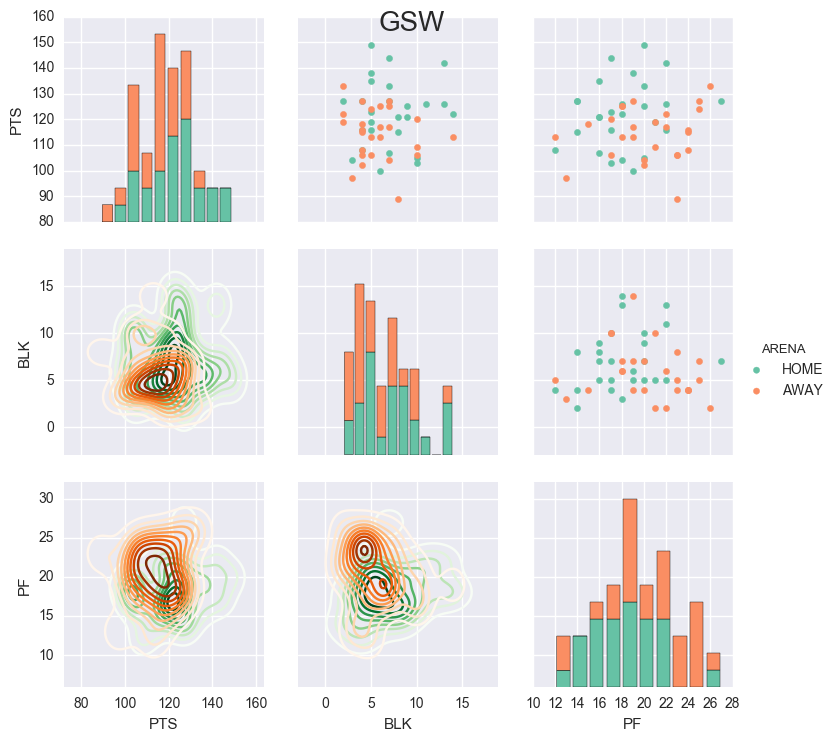

In [31]:
plotTeamAwayFactors("GSW")

Klay Thompson
  STATVAR  ARENAktcorr  absktcorr    ktpval  ARENAsmcorr  abssmcorr    smpval
3     FG%     0.334487   0.334487  0.000407     0.402957   0.402957  0.002775
6     3P%     0.294891   0.294891  0.001827     0.351582   0.351582  0.009837
4     3PM     0.193203   0.193203  0.041131     0.221289   0.221289  0.111293


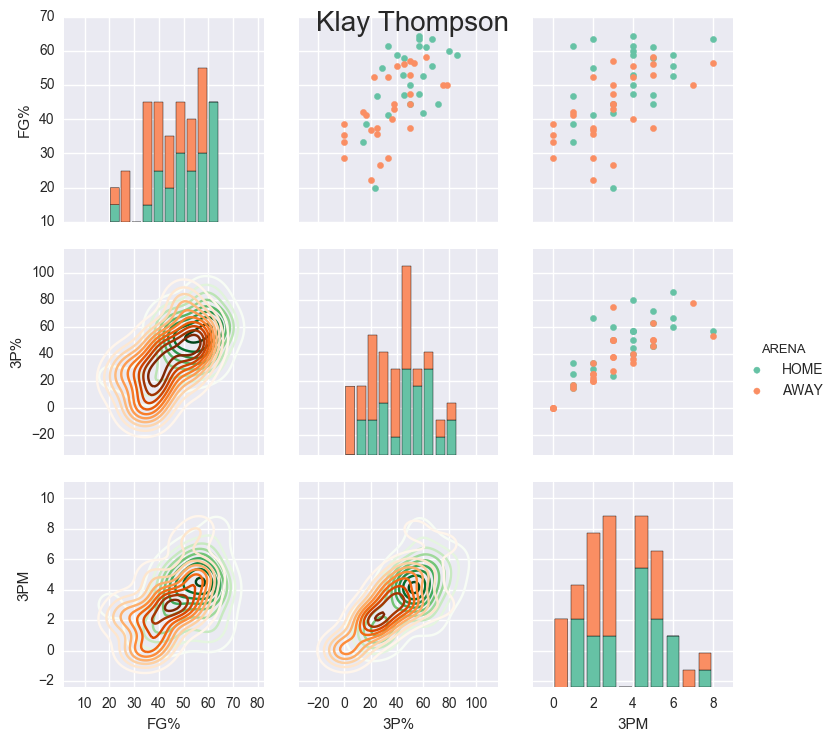

In [25]:
plotPlayerHomeFactors("Klay Thompson")